# Deep Learning Assignment
**Instructions:** You have recently watched the first four videos of the 3Blue1Brown deep learning series and the basics of Pytorch videos. This assignment will test your understanding of the concepts presented in those videos. Please answer the questions thoroughly, and write your code in Python using popular deep learning libraries like TensorFlow or PyTorch.


## Theoretical Questions


### 1. Neural Network Basics:
Explain the following terms in the context of neural networks:
 1. Neuron: 
 2. Activation Function:
 3. Weights and Biases:
 4. Feedforward Process:
 5. Backpropagation:


1. Neuron:
A neuron in a neural network is a basic processing unit that mimics biological neurons. It takes in multiple inputs, applies weights to them, adds a bias, and passes the result through an activation function to produce an output. The neuron is responsible for transforming input data into meaningful signals for the next layer.

2. Activation Function:
An activation function introduces non-linearity to the model, which helps the network learn complex patterns. After calculating the weighted sum and bias, the neuron’s output passes through an activation function. Common ones include Sigmoid, which outputs values between 0 and 1, and ReLU, which outputs the input if it’s positive, otherwise zero.

3. Weights and Biases:
Weights control the importance of each input, while the bias allows the model to adjust and fit the data better, even when inputs are zero. Together, they are the key parameters that the network learns during training, adjusting to minimize prediction errors.

4. Feedforward Process:
The feedforward process is the flow of data from the input layer through the hidden layers to the output layer. Each neuron processes its inputs, applies weights and biases, and passes the result forward to the next layer, ultimately producing a prediction.

5. Backpropagation:
Backpropagation is the learning process used to update the weights and biases of the network. After the model makes a prediction, it calculates the error and sends it back through the network, adjusting the parameters in each layer to reduce the error for future predictions. It ensures the model improves over time.

### 2. Visualizing Neural Networks:
Based on the videos, why is visualizing neural networks as "function layers" a useful way to understand their operation? Provide an example of how a simple neural network might be visualized this way and what each layer represents.


Visualizing neural networks as "function layers" is useful because it simplifies how we understand the network's learning process. Each layer acts like a function that transforms the data, helping us see how raw inputs evolve into meaningful outputs. By breaking the network down into these steps, it becomes clearer how information flows through the network, layer by layer.

Example: Visualizing a Simple Neural Network
Take a simple neural network used for binary classification:

Input Layer: This layer takes two input features (like in an XOR problem).
Hidden Layer: A few neurons here apply weights, biases, and an activation function (like Sigmoid or ReLU). This transforms the input into something more useful for the network.
Output Layer: Finally, the network produces a single output value (for example, between 0 and 1, indicating class probability).
In this way:

The input layer accepts the raw data.
The hidden layer processes the data, learning key features.
The output layer combines everything to give the final prediction.
By thinking of each layer as a function, you can see how the network gradually refines the data, improving its predictions step-by-step.

## Coding Questions


Run the below cells before running/doing the other to install all the dependancies for the assignment

In [2]:
%pip install numpy
%pip install matplotlib
%pip install torch

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


### 1. Implementing a Single Neuron:
- Write a Python function that simulates a single neuron. The function should take a list of inputs, weights, and a bias, and return the output using a sigmoid activation function.


In [3]:
import numpy as np

def sigmoid(x):
    '''Applies the sigmoid activation function.'''
    return 1 / (1 + np.exp(-x))

def single_neuron(inputs, weights, bias):
    '''Calculates the output of a single neuron using the sigmoid activation function.'''
    # Compute the weighted sum of inputs and bias
    total_input = np.dot(inputs, weights) + bias
    # Apply the sigmoid activation function
    return sigmoid(total_input)

# Example usage
inputs = [0.5, 0.6, 0.1]
weights = [0.4, 0.3, 0.8]
bias = -0.1
output = single_neuron(inputs, weights, bias)
print('Output:', output)


Output: 0.5890404340586651


### 2. Building a Simple Neural Network:
Using a deep learning library (PyTorch), build a simple neural network with one hidden layer. Use this network to perform binary classification on a small dataset (the XOR dataset). Remember the activation function you are supposed to use is the Sigmoid function, use the one given by pytorch itself, no need to refer to Q1


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.hidden = nn.Linear(2, 2)  # 2 input features, 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons to 1 output neuron
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation function
        
    def forward(self, x):
        # Apply the layers and activation functions
        x = self.sigmoid(self.hidden(x))  # Hidden layer with sigmoid
        x = self.sigmoid(self.output(x))  # Output layer with sigmoid
        return x

# Instantiate the model
model = SimpleNN()

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

# Train the model
for epoch in range(5000):
    # Forward pass: compute predictions
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass: compute gradients
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    
    # Optimize the weights
    optimizer.step()
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    predictions = model(X)
    predictions = predictions.round()  # Round the output to 0 or 1
    accuracy = (predictions == y).float().mean()
    print(f'Model Accuracy: {accuracy.item() * 100:.2f}%')


Epoch [500/5000], Loss: 0.6936
Epoch [1000/5000], Loss: 0.6933
Epoch [1500/5000], Loss: 0.6932
Epoch [2000/5000], Loss: 0.6930
Epoch [2500/5000], Loss: 0.6928
Epoch [3000/5000], Loss: 0.6925
Epoch [3500/5000], Loss: 0.6920
Epoch [4000/5000], Loss: 0.6905
Epoch [4500/5000], Loss: 0.6868
Epoch [5000/5000], Loss: 0.6762
Model Accuracy: 75.00%


### 3. Visualizing the Learning Process:
Modify the neural network code from Question 2 to record the loss at each epoch. Plot the loss over epochs using Matplotlib to visualize how the network learns over time.


Epoch [500/5000], Loss: 0.6926
Epoch [1000/5000], Loss: 0.6904
Epoch [1500/5000], Loss: 0.6808
Epoch [2000/5000], Loss: 0.6491
Epoch [2500/5000], Loss: 0.5938
Epoch [3000/5000], Loss: 0.5417
Epoch [3500/5000], Loss: 0.4947
Epoch [4000/5000], Loss: 0.4233
Epoch [4500/5000], Loss: 0.2938
Epoch [5000/5000], Loss: 0.1752


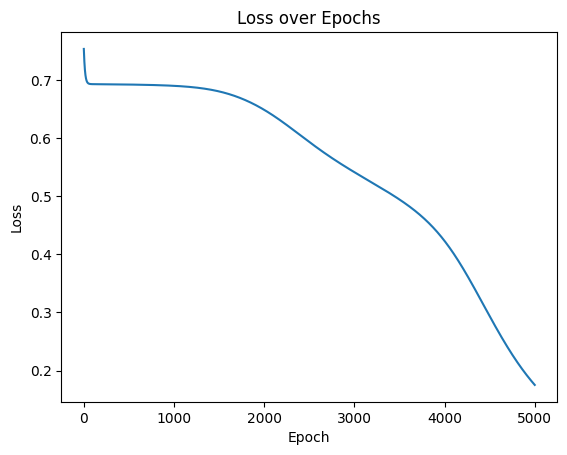

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input neurons, 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons to 1 output neuron
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.sigmoid(self.hidden(x))  # Hidden layer with sigmoid
        x = self.sigmoid(self.output(x))  # Output layer with sigmoid
        return x

# Instantiate the model
model = SimpleNN()

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Stochastic Gradient Descent optimizer

# List to store the loss values over epochs
losses = []

# Train the model and record the loss at each epoch
for epoch in range(5000):
    # Forward pass: compute predictions
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass: compute gradients
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagate the loss
    
    # Optimize the weights
    optimizer.step()

    # Record the loss for this epoch
    losses.append(loss.item())
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.4f}')

# Plot the loss over epochs
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


## Submission Instructions:
- Answer the theoretical questions in a separate markdown
- Include comments in your code to explain your implementation.
